In [56]:
import numpy as np
import os


from statsmodels.stats import multitest

outdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized_lmcorrected_withage_35peer/aa/tejaas/permnull_sb0.1/chr22"
outfile = os.path.join(outdir, "rr.txt")

#outdir_random = "/scratch/sbanerj/trans-eqtl/dev-pipeline/lmcorrected/gtex-ms/tejaas_rand/mafnull_sb0.01/chr7"
#outfile_random = os.path.join(outdir_random, "rr.txt")

#outdir_peer = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex-ms_35peer/tejaas/permnull_sb0.01/chr7"
#outfiles_peer = glob.glob( outdir_peer + "/chunk*_rr.txt")

In [57]:
def read_tejaas_rr_pvals(filename):
    pvals = list()
    with open(filename, "r") as mfile:
        next(mfile)
        for line in mfile:
            pvals.append(float(line.split()[5]))
    pvals = np.array(pvals)
    return pvals

pvals = read_tejaas_rr_pvals(outfile)
#pvals_random = read_tejaas_rr_pvals(outfile_random)
#pvals_peer = read_tejaas_rr_pvals(outfiles_peer)

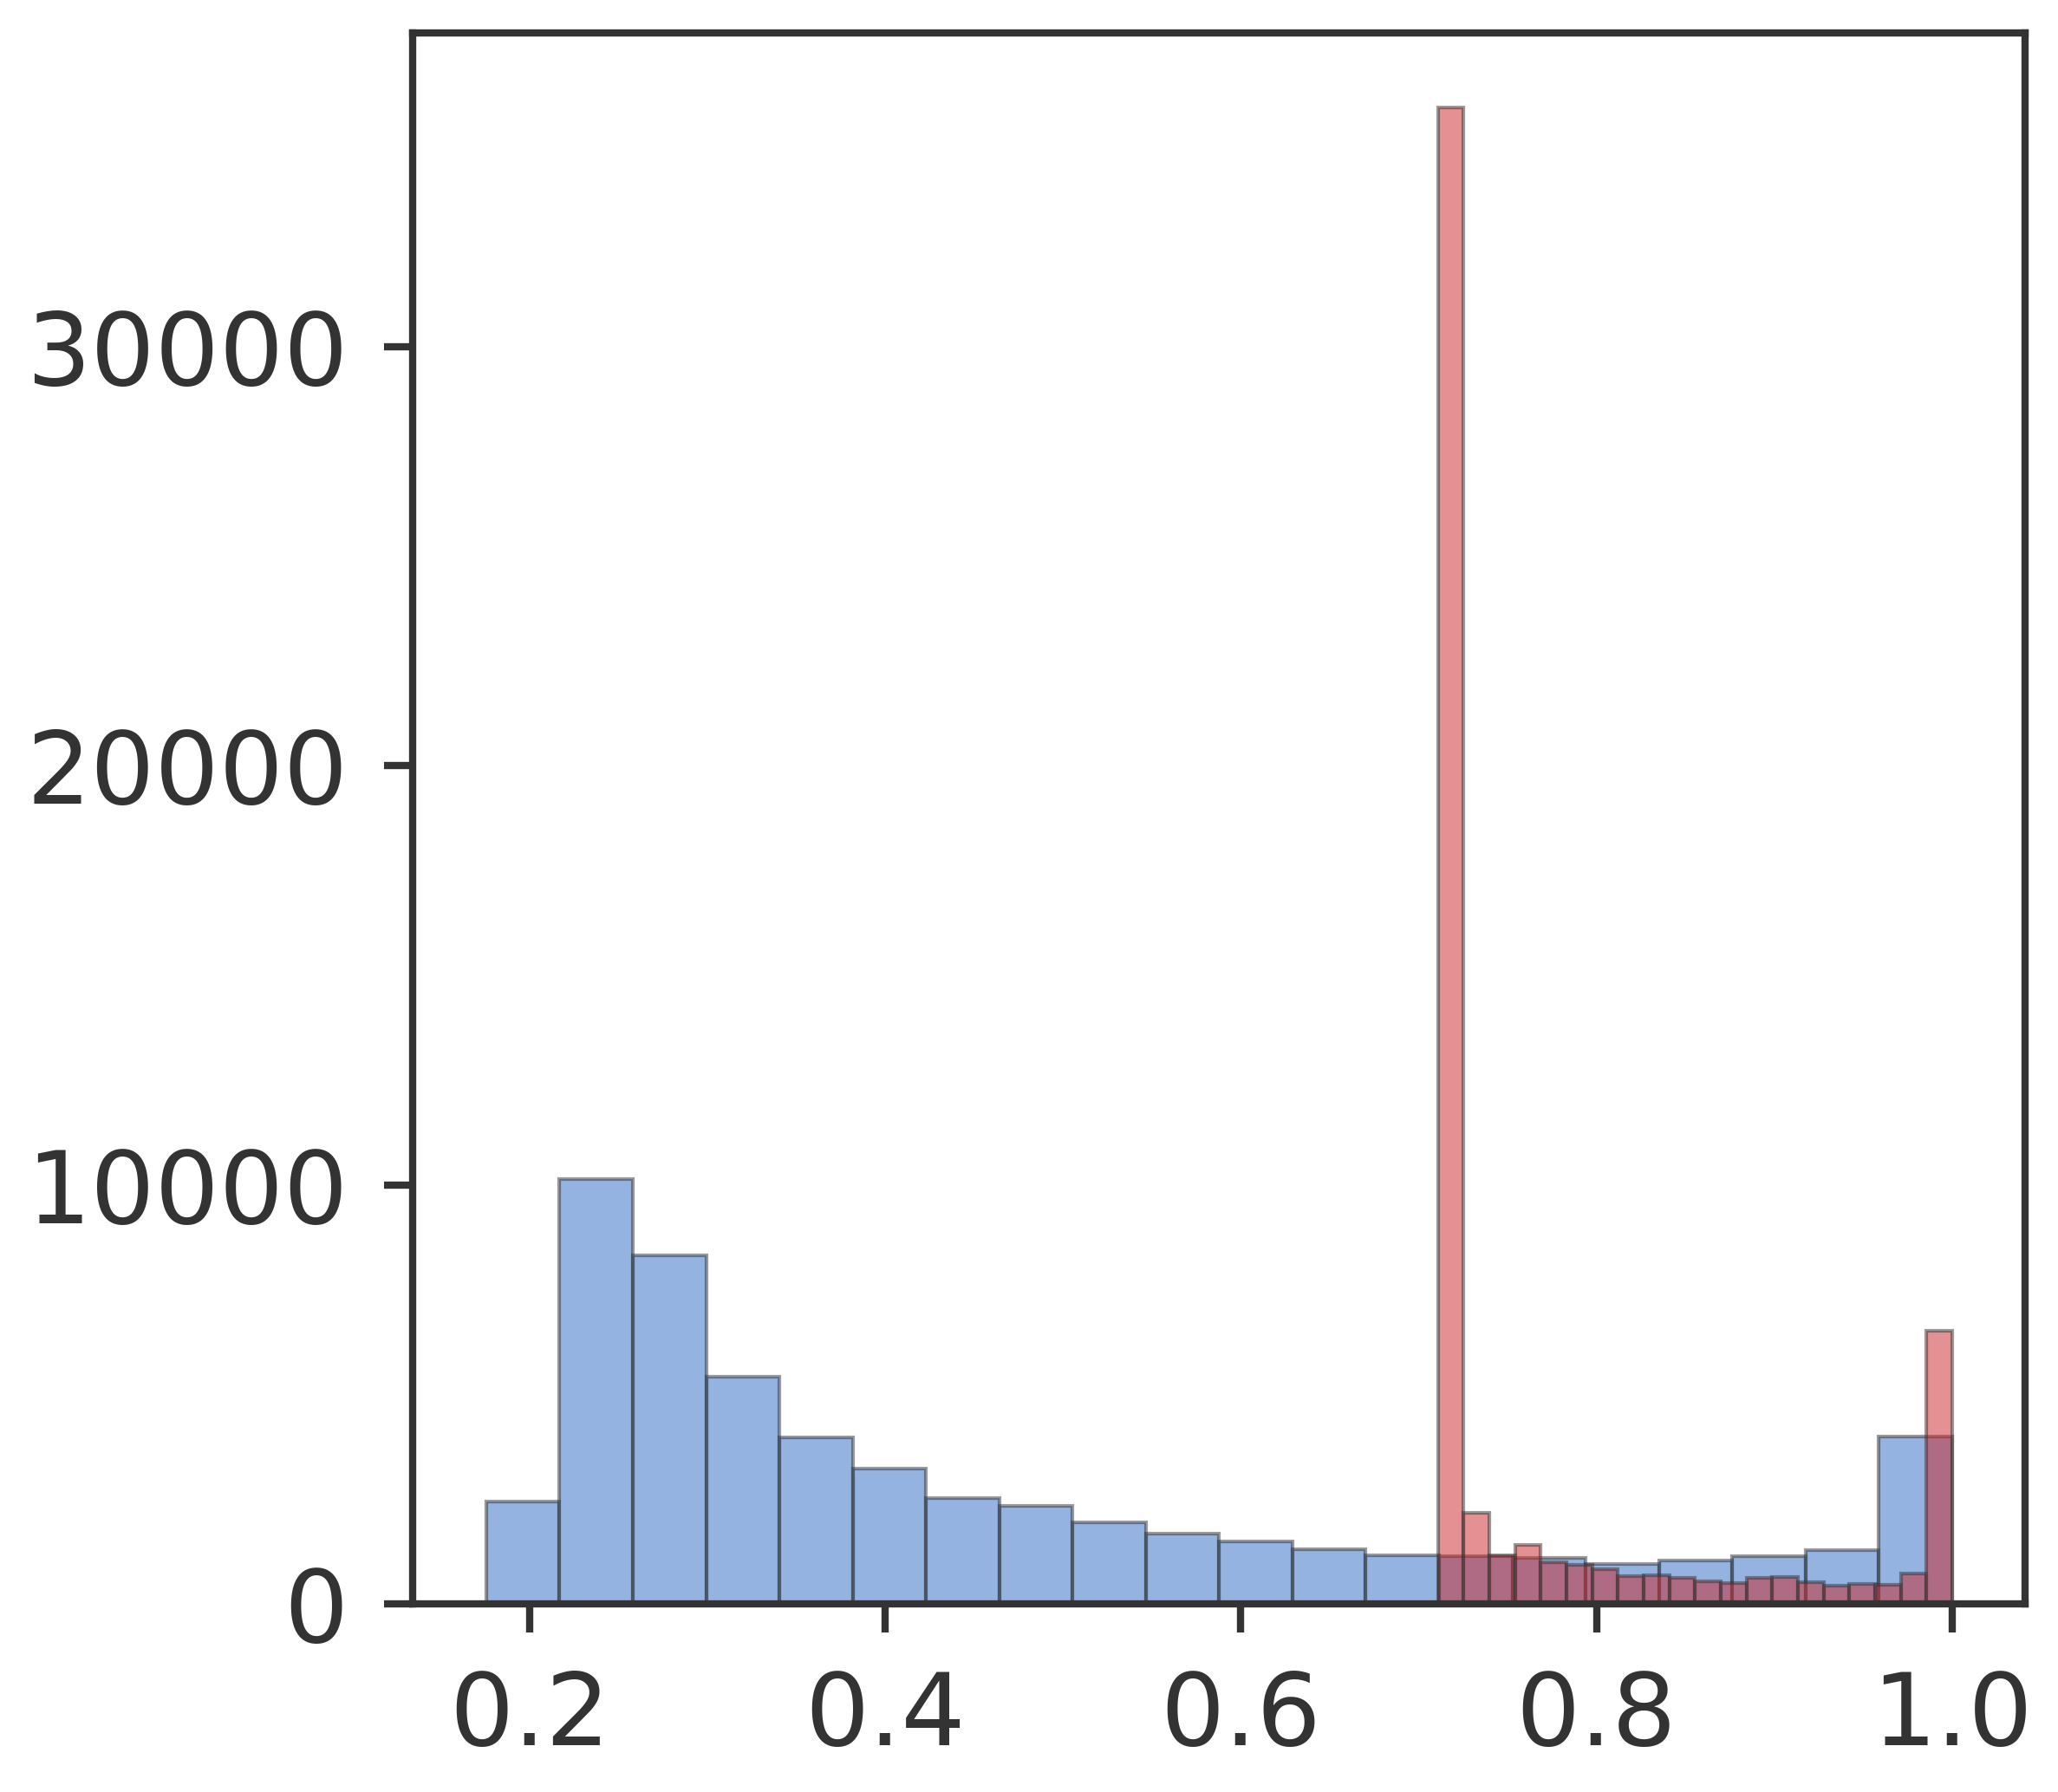

In [58]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'system')

_, pcorr, _, _ = multitest.multipletests(pvals, method='fdr_bh')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(pvals, alpha = 0.5)
ax1.hist(pcorr, alpha = 0.5)
plt.show()

In [59]:
np.min(pcorr)

0.7109312344541832

In [60]:
np.min(pcorr[np.where(pcorr > 0)])

0.7109312344541832

In [61]:
pvals[np.where(pvals > 0)]

array([0.994656, 0.919494, 0.510242, ..., 0.303375, 0.42647 , 0.971053])

In [62]:
nonzero_pvals = pvals[np.where(pvals > 0)]
nonzero_pvals[np.argsort(nonzero_pvals)][:100]

array([0.175827, 0.176147, 0.177101, 0.178258, 0.178383, 0.178495,
       0.178495, 0.178495, 0.178697, 0.178697, 0.178991, 0.179291,
       0.179589, 0.179677, 0.180255, 0.180255, 0.180598, 0.180842,
       0.181304, 0.181507, 0.181552, 0.18181 , 0.18181 , 0.18181 ,
       0.18202 , 0.182183, 0.182502, 0.182675, 0.182806, 0.182973,
       0.182973, 0.18328 , 0.18334 , 0.183834, 0.183834, 0.183834,
       0.184104, 0.184121, 0.184121, 0.184316, 0.184327, 0.184327,
       0.184327, 0.184327, 0.184327, 0.18452 , 0.184667, 0.184907,
       0.184907, 0.185061, 0.185086, 0.185238, 0.185276, 0.185276,
       0.185622, 0.185721, 0.185812, 0.185833, 0.185999, 0.186006,
       0.186006, 0.186278, 0.186352, 0.186433, 0.186487, 0.186928,
       0.187122, 0.187364, 0.187554, 0.187591, 0.187851, 0.188022,
       0.188023, 0.188038, 0.188038, 0.188318, 0.18843 , 0.18843 ,
       0.188459, 0.188546, 0.188579, 0.188686, 0.188811, 0.189237,
       0.189356, 0.189356, 0.189356, 0.189356, 0.189356, 0.189